<a href="https://colab.research.google.com/github/anjalys/Incentive-for-drivers-on-e-vehicle/blob/main/Incentivize_drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Business Requirements**

Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries.  It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company. Lithionpower has a variable pricing model based on driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driven per day etc.

Key issues

Drivers will be incentivized based on the cluster, so grouping has to be accurate.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
datafile = files.upload()

Saving driver-data.csv to driver-data (1).csv


# New Section

In [ ]:
data = pd.read_csv('driver-data.csv')

In [ ]:
data.shape

(4000, 3)

In [ ]:
data.head(10)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
5,3423313857,41.91,10
6,3423312432,58.64,20
7,3423311434,52.02,8
8,3423311328,31.25,34
9,3423312488,44.31,19


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
## Number of clusters 4 based on the driver classification category 
kmeans = KMeans(n_clusters=4)

In [ ]:
data1 = data[['mean_dist_day', 'mean_over_speed_perc']]

In [ ]:
kmeans.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.inertia_

719601.5383469037

In [ ]:
kmeans.cluster_centers_

array([[ 50.46127059,  32.42823529],
       [180.34311782,  10.52011494],
       [ 49.98428468,   5.21441441],
       [177.83509615,  70.28846154]])

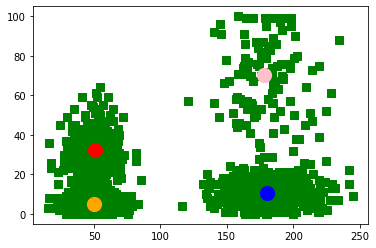

In [ ]:
plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c='g', s=50, marker='s')

plt.scatter(50.40482436,  32.36533958, c='r', s=200, marker='o')

plt.scatter(180.34311782,  10.52011494, c='b', s=200, marker='o')

plt.scatter(49.99263253,   5.20447169, c='orange', s=200, marker='o')

plt.scatter(177.83509615,  70.28846154, c='pink', s=200, marker='o')

plt.show()

In [ ]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
kmeans.predict(second_test)

array([2], dtype=int32)

In [ ]:
pred = kmeans.predict(data1)

In [ ]:
frame = pd.DataFrame(data1)
frame['cluster'] = pred

In [ ]:
frame['cluster'].value_counts()

2    2775
1     696
0     425
3     104
Name: cluster, dtype: int64

In [ ]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = None, n_clusters = cluster, init='k-means++')
    kmeans.fit(data1)
    SSE.append(kmeans.inertia_)


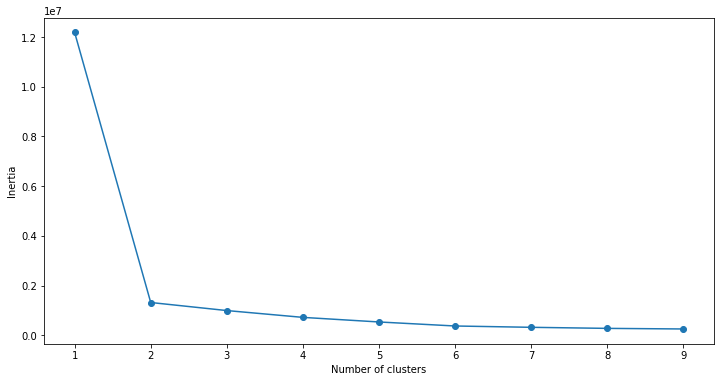

In [ ]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

So number of clusters found best for this data is 2